### Performing Correlation and Regression Analysis on a dataset

#### Importing libraries

In [2]:
import pandas as pd

In [4]:
import numpy as np

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
import sklearn as sl

In [9]:
from sklearn.linear_model import LinearRegression

#### Loading Dataset


In [33]:
df=pd.read_csv('C:\\Users\\nazir\\Downloads\\archive (2)\\bmi.csv')

In [34]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


#### Data Preprocessing

In [35]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [36]:
df.duplicated().sum()

11

In [37]:
df.drop_duplicates(inplace=True)
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [38]:
df.reset_index(inplace=True)
df

,index,Gender,Height,Weight,Index
0,0,Male,174,96,4
1,1,Male,189,87,2
2,2,Female,185,110,4
3,3,Female,195,104,3
4,4,Male,149,61,3
...,...,...,...,...,...
484,495,Female,150,153,5
485,496,Female,184,121,4
486,497,Female,141,136,5
487,498,Male,150,95,5


#### Linear Regression on Height and Weight

In [40]:
X = pd.get_dummies(df['Height'], drop_first=True)
y = df['Weight'].values

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_

print(coefficients)

[ -8.23214286  -5.5          2.95833333 -17.975        1.73611111
  -0.375      -13.66071429 -19.975      -36.175      -21.46590909
 -20.875        6.875      -11.775      -12.575      -23.875
 -18.04166667 -31.375        8.625        4.625       -2.08928571
   5.18055556 -19.26388889   1.375      -17.25       -20.175
   6.18055556 -11.           3.625       -6.075      -15.04166667
  22.33928571 -17.875        0.375      -23.23214286   4.375
 -11.66071429 -16.75        -3.91346154  -2.60576923 -27.875
  -9.01136364 -10.28409091  -5.19318182   3.79166667 -17.82954545
  12.95833333 -10.23214286 -17.50833333  -0.975      -18.48611111
 -31.20833333  -2.20833333 -23.175       -0.175      -14.93055556
  -7.54166667   1.91071429 -17.375        0.29166667]


#### Finding Correlation between Height and Weight

In [41]:
correlation_remote_ratio_salary = df['Height'].corr(df['Weight'])
print("Correlation between 'Height' and 'Weight':", correlation_remote_ratio_salary)

Correlation between 'Height' and 'Weight': 0.0006962678246843091


#### Finding Correlation Coeffiient for Male

In [62]:
male=df[df["Gender"]=="Male"]
malee=df[["Height","Weight"]]
malee.corr()



,Height,Weight
Height,1.000000,0.000696
Weight,0.000696,1.000000


#### Finding Correlation Coeffiient for Female

In [63]:
female=df[df["Gender"]=="Female"]
femalee=df[["Height","Weight"]]
femalee.corr()

,Height,Weight
Height,1.000000,0.000696
Weight,0.000696,1.000000


#### Plotting a scatter plot of the dataframe

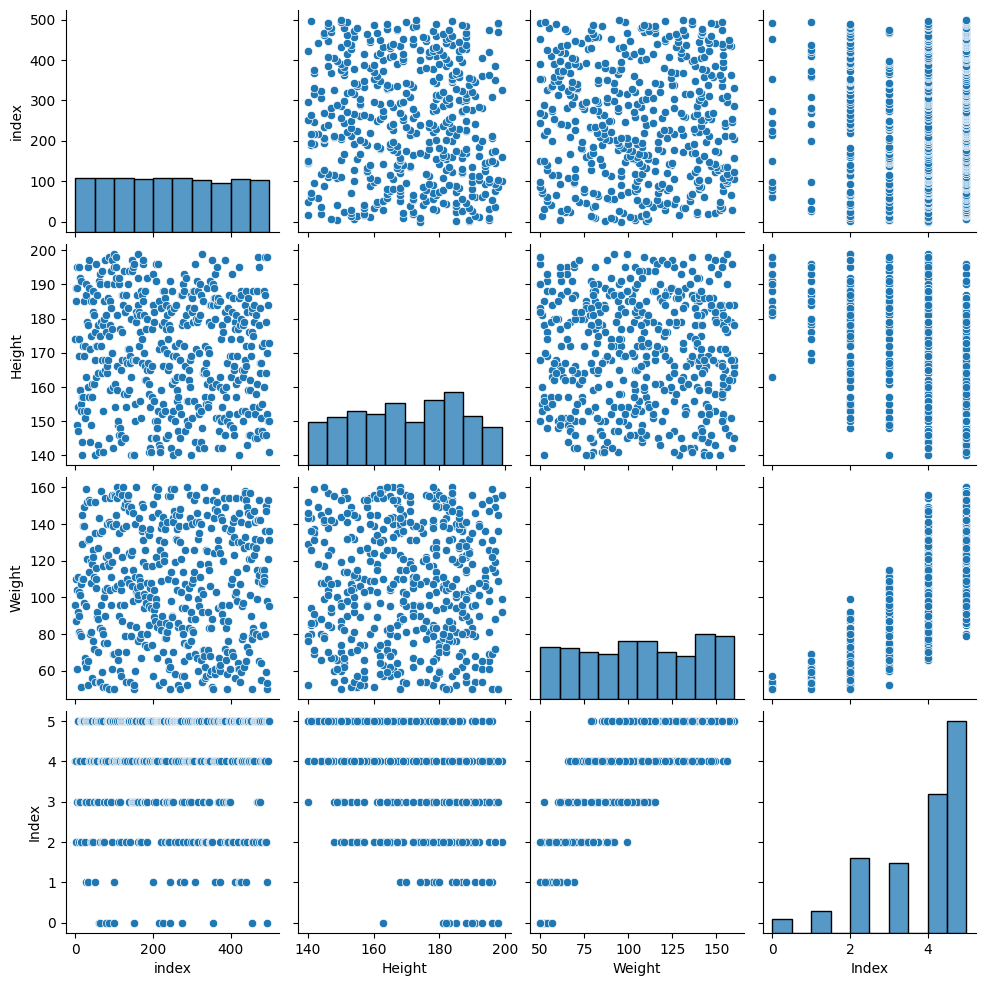

In [42]:
sns.pairplot(df,kind="scatter")
plt.show()

#### Plotting Height VS Weight

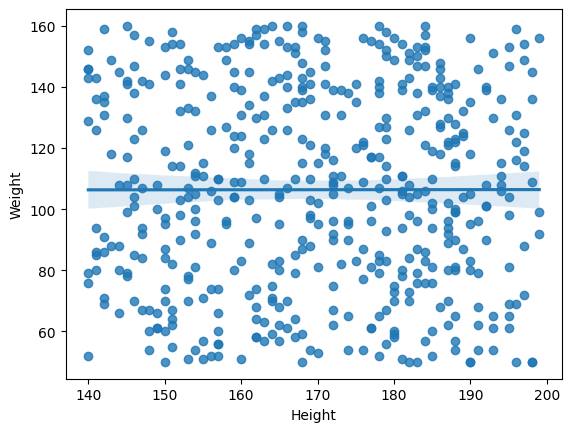

In [43]:
sns.regplot(x = "Height", y = "Weight", data = df)
plt.show()

#### Relationship between Height and Weight

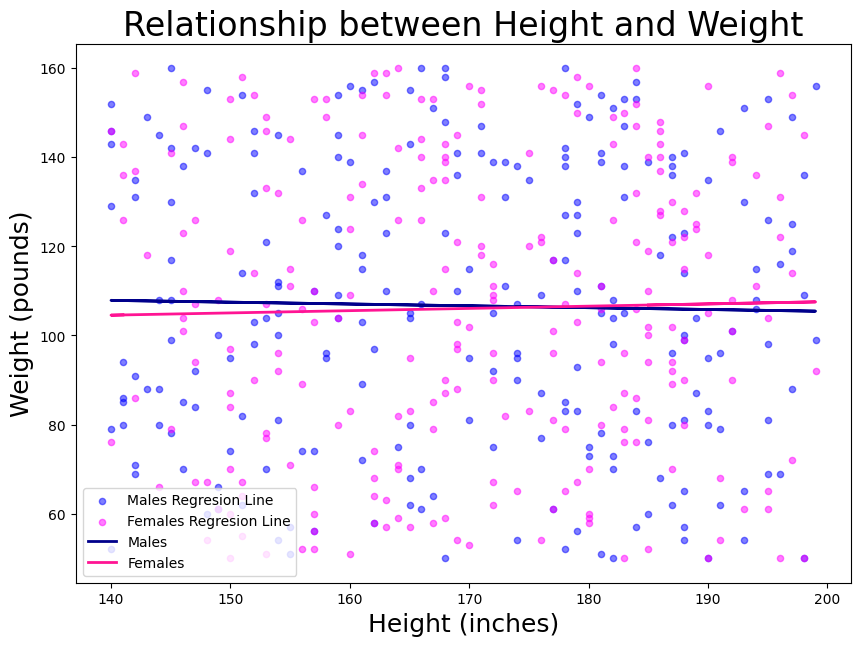

In [46]:
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)

female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);


#### Fitting Simple leanear Regression

In [70]:
df_males = df[df['Gender'] == 'Male']

lr_males = LinearRegression()

lr_males.fit(df_males[['Height']], df_males['Weight'])

print("Simple Linear Regression Male: ",lr_males.intercept_)

print(lr_males.coef_)

df_females = df[df['Gender'] == 'Female']

lr_females = LinearRegression()

lr_females.fit(df_females[['Height']], df_females['Weight'])

print("Simple Linear Regression Female: ",lr_females.intercept_)

Simple Linear Regression Male:  113.63593237744819
[-0.04105469]
Simple Linear Regression Female:  97.49839160897756
